In [2]:
from pandas_datareader.famafrench import get_available_datasets

import pandas as pd
import numpy as np

from statsmodels.api import OLS, add_constant
import pandas_datareader.data as web

from linearmodels.asset_pricing import LinearFactorModel

import matplotlib.pyplot as plt
import seaborn as sns

DIR = '/Users/yoon/dev/qe/resource/machine_learning_for_algorithmic_trading_2nd_edition'

In [3]:
ff_factor = 'F-F_Research_Data_5_Factors_2x3'
ff_portfolio = '17_Industry_Portfolios'

In [4]:
ff_factor_data = web.DataReader(ff_factor, 'famafrench', start='2010', end='2017-12')[0]
ff_factor_data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 96 entries, 2010-01 to 2017-12
Freq: M
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  96 non-null     float64
 1   SMB     96 non-null     float64
 2   HML     96 non-null     float64
 3   RMW     96 non-null     float64
 4   CMA     96 non-null     float64
 5   RF      96 non-null     float64
dtypes: float64(6)
memory usage: 5.2 KB


In [5]:
ff_portfolio_data = web.DataReader(ff_portfolio, 'famafrench', start='2010', end='2017-12')[0]
ff_portfolio_data = ff_portfolio_data.sub(ff_factor_data.RF, axis=0)
ff_portfolio_data

,Food,Mines,Oil,Clths,Durbl,Chems,Cnsum,Cnstr,Steel,FabPr,Machn,Cars,Trans,Utils,Rtail,Finan,Other
Date,,,,,,,,,,,,,,,,,
2010-01,-2.06,-12.89,-4.83,-3.47,-3.51,-4.43,-0.44,-2.88,-11.92,-2.98,-7.33,-0.15,-2.11,-4.49,-1.30,-1.07,-4.84
2010-02,1.86,12.38,2.26,6.70,9.94,5.79,1.38,5.90,4.20,7.32,7.31,6.52,5.98,-0.41,3.70,2.70,2.48
2010-03,5.05,7.23,3.21,11.13,5.55,7.50,3.26,5.54,12.03,5.29,7.75,8.87,8.99,3.12,6.46,8.16,6.43
2010-04,-1.29,-0.85,4.31,4.75,6.87,2.48,-1.97,10.86,-2.64,3.43,4.81,6.75,3.06,2.84,1.35,0.92,1.72
2010-05,-4.82,-7.96,-10.11,-5.99,-5.52,-10.57,-6.28,-8.09,-7.02,-9.00,-8.10,-6.89,-7.61,-6.30,-5.72,-9.22,-7.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08,-1.88,0.65,-5.21,-4.70,-3.69,1.49,0.55,-0.45,1.56,-1.53,1.27,0.67,1.50,2.11,-1.43,-1.31,1.68
2017-09,-0.28,-1.21,10.89,0.94,4.49,6.92,0.56,7.73,3.63,7.29,5.61,7.45,4.69,-2.06,0.65,5.13,0.18
2017-10,0.88,1.25,0.28,3.15,-1.65,4.70,-3.68,3.95,2.14,1.63,5.99,1.09,-0.34,2.98,3.89,3.30,2.47


In [6]:
ff_portfolio_data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 96 entries, 2010-01 to 2017-12
Freq: M
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Food    96 non-null     float64
 1   Mines   96 non-null     float64
 2   Oil     96 non-null     float64
 3   Clths   96 non-null     float64
 4   Durbl   96 non-null     float64
 5   Chems   96 non-null     float64
 6   Cnsum   96 non-null     float64
 7   Cnstr   96 non-null     float64
 8   Steel   96 non-null     float64
 9   FabPr   96 non-null     float64
 10  Machn   96 non-null     float64
 11  Cars    96 non-null     float64
 12  Trans   96 non-null     float64
 13  Utils   96 non-null     float64
 14  Rtail   96 non-null     float64
 15  Finan   96 non-null     float64
 16  Other   96 non-null     float64
dtypes: float64(17)
memory usage: 13.5 KB


In [7]:
with pd.HDFStore(f'{DIR}/assets.h5') as store:

    print(store.info())

<class 'pandas.io.pytables.HDFStore'>
File path: /Users/yoon/dev/qe/resource/machine_learning_for_algorithmic_trading_2nd_edition/assets.h5
/quandl/wiki/prices            frame        (shape->[15389314,12])
/quandl/wiki/stocks            frame        (shape->[1,2])        
/sp500/fred                    frame        (shape->[2609,1])     
/sp500/stocks                  frame        (shape->[505,7])      
/us_equities/stocks            frame        (shape->[6834,6])     


In [8]:
with pd.HDFStore(f'{DIR}/assets.h5') as store:
    
    prices = store['/quandl/wiki/prices'].adj_close.unstack().loc['2010':'2017']
    equities = store['/us_equities/stocks'].drop_duplicates()

In [9]:
equities

,name,lastsale,marketcap,ipoyear,sector,industry
ticker,,,,,,
PIH,"1347 Property Insurance Holdings, Inc.",7.2001,4.309000e+07,2014.0,Finance,Property-Casualty Insurers
PIHPP,"1347 Property Insurance Holdings, Inc.",25.6200,NaN,NaN,Finance,Property-Casualty Insurers
TURN,180 Degree Capital Corp.,2.2600,7.033000e+07,NaN,Finance,Finance/Investors Services
FLWS,"1-800 FLOWERS.COM, Inc.",12.9000,8.333900e+08,1999.0,Consumer Services,Other Specialty Stores
FCCY,1st Constitution Bancorp (NJ),21.3000,1.781400e+08,NaN,Finance,Savings Institutions
...,...,...,...,...,...,...
ZOES,"Zoe&#39;s Kitchen, Inc.",10.0700,1.974000e+08,2014.0,Consumer Services,Restaurants
ZTS,Zoetis Inc.,86.0700,4.165000e+10,2013.0,Health Care,Major Pharmaceuticals
ZTO,ZTO Express (Cayman) Inc.,20.2200,1.434000e+10,2016.0,Transportation,Trucking Freight/Courier Services


In [10]:
prices

ticker,A,AA,AAL,AAMC,AAN,AAOI,AAON,AAP,AAPL,AAT,...,ZIOP,ZIXI,ZLC,ZLTQ,ZMH,ZNGA,ZOES,ZQK,ZTS,ZUMZ
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,21.354133,NaN,12.394092,NaN,14.391425,NaN,5.472257,39.554636,27.503268,NaN,...,2.95,1.78,2.70,NaN,58.049747,NaN,NaN,2.24,NaN,12.360
2010-01-05,21.122172,NaN,13.797197,NaN,14.520197,NaN,5.313483,39.319541,27.550818,NaN,...,3.05,1.70,2.69,NaN,59.887376,NaN,NaN,2.19,NaN,12.290
2010-01-06,21.047125,NaN,13.225561,NaN,14.520197,NaN,5.102695,39.662387,27.112585,NaN,...,3.08,1.70,2.69,NaN,59.868033,NaN,NaN,2.19,NaN,12.680
2010-01-07,21.019836,NaN,13.615313,NaN,14.637558,NaN,5.291583,39.652592,27.062465,NaN,...,3.04,2.22,2.70,NaN,61.241419,NaN,NaN,2.21,NaN,14.660
2010-01-08,21.013013,NaN,13.355478,NaN,14.539757,NaN,5.354545,39.809321,27.242385,NaN,...,3.10,2.12,2.78,NaN,59.955078,NaN,NaN,2.23,NaN,14.730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,67.350000,49.99,52.590000,77.8,40.260000,39.96,36.750000,100.550000,175.010000,37.74,...,4.05,4.45,NaN,NaN,NaN,4.00,17.19,NaN,71.99,21.450
2017-12-26,67.250000,50.38,52.850000,77.8,40.360000,38.91,36.600000,101.960000,170.570000,37.95,...,4.07,4.44,NaN,NaN,NaN,3.95,17.07,NaN,72.34,21.850
2017-12-27,67.300000,51.84,52.400000,74.0,40.600000,38.66,36.500000,99.770000,170.600000,37.91,...,4.03,4.56,NaN,NaN,NaN,4.01,17.57,NaN,72.45,21.150


In [11]:
prices.columns

Index(['A', 'AA', 'AAL', 'AAMC', 'AAN', 'AAOI', 'AAON', 'AAP', 'AAPL', 'AAT',
       ...
       'ZIOP', 'ZIXI', 'ZLC', 'ZLTQ', 'ZMH', 'ZNGA', 'ZOES', 'ZQK', 'ZTS',
       'ZUMZ'],
      dtype='object', name='ticker', length=3199)

In [12]:
equities.filter(prices.columns, axis=0)

,name,lastsale,marketcap,ipoyear,sector,industry
ticker,,,,,,
A,"Agilent Technologies, Inc.",61.25,1.960000e+10,1999.0,Capital Goods,Biotechnology: Laboratory Analytical Instruments
AA,Alcoa Corporation,45.80,8.540000e+09,2016.0,Basic Industries,Aluminum
AAL,"American Airlines Group, Inc.",37.75,1.767000e+10,NaN,Transportation,Air Freight/Delivery Services
AAMC,Altisource Asset Management Corp,68.55,1.104900e+08,NaN,Finance,Real Estate
AAN,"Aaron&#39;s, Inc.",44.09,3.200000e+09,NaN,Technology,Diversified Commercial Services
...,...,...,...,...,...,...
ZIXI,Zix Corporation,5.48,2.944800e+08,NaN,Technology,EDP Services
ZNGA,Zynga Inc.,4.14,3.550000e+09,2011.0,Technology,EDP Services
ZOES,"Zoe&#39;s Kitchen, Inc.",10.07,1.974000e+08,2014.0,Consumer Services,Restaurants


In [13]:
sectors = equities.filter(prices.columns, axis=0).sector.to_dict()
sectors

{'A': 'Capital Goods',
 'AA': 'Basic Industries',
 'AAL': 'Transportation',
 'AAMC': 'Finance',
 'AAN': 'Technology',
 'AAOI': 'Technology',
 'AAON': 'Capital Goods',
 'AAP': 'Consumer Services',
 'AAPL': 'Technology',
 'AAT': 'Consumer Services',
 'AAWW': 'Transportation',
 'ABAX': 'Capital Goods',
 'ABBV': 'Health Care',
 'ABC': 'Health Care',
 'ABCB': 'Finance',
 'ABG': 'Consumer Durables',
 'ABM': 'Finance',
 'ABMD': 'Health Care',
 'ABT': 'Health Care',
 'ACAD': 'Health Care',
 'ACC': 'Consumer Services',
 'ACCO': 'Consumer Durables',
 'ACET': 'Health Care',
 'ACGL': 'Finance',
 'ACHC': 'Health Care',
 'ACHN': 'Health Care',
 'ACIW': 'Technology',
 'ACLS': 'Technology',
 'ACM': 'Consumer Services',
 'ACN': 'Miscellaneous',
 'ACOR': 'Health Care',
 'ACRE': 'Consumer Services',
 'ACRX': 'Health Care',
 'ACTG': 'Miscellaneous',
 'ACXM': 'Technology',
 'ADBE': 'Technology',
 'ADC': 'Consumer Services',
 'ADES': 'Basic Industries',
 'ADI': 'Technology',
 'ADM': 'Consumer Non-Durables',

In [14]:
prices = prices.filter(sectors.keys()).dropna(how='all', axis=1)
prices

ticker,A,AA,AAL,AAMC,AAN,AAOI,AAON,AAP,AAPL,AAT,...,ZEN,ZEUS,ZGNX,ZION,ZIOP,ZIXI,ZNGA,ZOES,ZTS,ZUMZ
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,21.354133,NaN,12.394092,NaN,14.391425,NaN,5.472257,39.554636,27.503268,NaN,...,NaN,32.810030,NaN,12.807981,2.95,1.78,NaN,NaN,NaN,12.360
2010-01-05,21.122172,NaN,13.797197,NaN,14.520197,NaN,5.313483,39.319541,27.550818,NaN,...,NaN,32.596789,NaN,13.259575,3.05,1.70,NaN,NaN,NaN,12.290
2010-01-06,21.047125,NaN,13.225561,NaN,14.520197,NaN,5.102695,39.662387,27.112585,NaN,...,NaN,33.876235,NaN,14.412582,3.08,1.70,NaN,NaN,NaN,12.680
2010-01-07,21.019836,NaN,13.615313,NaN,14.637558,NaN,5.291583,39.652592,27.062465,NaN,...,NaN,33.440060,NaN,16.026791,3.04,2.22,NaN,NaN,NaN,14.660
2010-01-08,21.013013,NaN,13.355478,NaN,14.539757,NaN,5.354545,39.809321,27.242385,NaN,...,NaN,34.486880,NaN,15.767365,3.10,2.12,NaN,NaN,NaN,14.730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,67.350000,49.99,52.590000,77.8,40.260000,39.96,36.750000,100.550000,175.010000,37.74,...,33.67,22.150000,38.70,51.330000,4.05,4.45,4.00,17.19,71.99,21.450
2017-12-26,67.250000,50.38,52.850000,77.8,40.360000,38.91,36.600000,101.960000,170.570000,37.95,...,33.81,22.200000,40.10,50.860000,4.07,4.44,3.95,17.07,72.34,21.850
2017-12-27,67.300000,51.84,52.400000,74.0,40.600000,38.66,36.500000,99.770000,170.600000,37.91,...,33.78,21.830000,40.30,50.710000,4.03,4.56,4.01,17.57,72.45,21.150


In [15]:
returns = prices.resample('M').last().pct_change().mul(100).to_period('M')
returns = returns.dropna(how='all').dropna(axis=1)
returns.info()
returns

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 95 entries, 2010-02 to 2017-12
Freq: M
Columns: 1986 entries, A to ZUMZ
dtypes: float64(1986)
memory usage: 1.4 MB


ticker,A,AAL,AAN,AAON,AAP,AAPL,AAWW,ABAX,ABC,ABCB,...,YRCW,YUM,ZAGG,ZBH,ZBRA,ZEUS,ZION,ZIOP,ZIXI,ZUMZ
date,,,,,,,,,,,,,,,,,,,,,
2010-02,12.236889,38.041431,7.757848,2.185527,3.422053,6.537959,22.934279,5.440199,3.163980,1.713062,...,-50.549451,-1.432330,29.702970,1.793327,9.463602,-0.220951,-2.212411,6.389776,2.659574,12.647290
2010-03,9.313414,0.272851,13.068473,7.509506,2.887175,14.847034,17.679681,7.089405,3.138374,-4.215479,...,17.777778,13.671412,8.015267,3.261816,3.605180,18.040492,17.799353,52.552553,19.689119,42.887029
2010-04,5.437627,-3.809524,3.646409,6.763926,7.585878,11.102128,4.184731,-4.771975,6.673582,23.255814,...,3.773585,11.228094,7.416961,2.888512,-1.858108,-2.664625,31.547619,16.535433,6.926407,-9.419229
2010-05,-10.755654,24.893918,-14.658849,2.194617,14.767184,-1.612471,-5.427899,-13.063628,1.658232,1.257862,...,-35.418182,-3.465347,-22.694825,-8.175997,-5.335628,-13.214885,-16.606132,-14.695946,-4.858300,-7.758621
2010-06,-12.144623,-2.491506,-14.363696,-4.808984,-2.938203,-2.082685,-9.125694,-4.797868,1.502558,-13.874292,...,-57.770270,-4.664225,22.127660,-3.361346,-7.745455,-16.654572,-9.937370,-37.029703,-3.829787,-5.899533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08,8.245526,-11.117858,-4.343129,-3.550296,-12.597090,10.625073,12.457912,-1.357917,-14.073315,-3.820961,...,0.752445,1.775305,49.112426,-5.811078,1.346834,6.905658,-3.406683,15.551537,-0.375235,-1.968504
2017-09,-0.803461,6.146625,-1.383225,5.751534,1.392784,-6.024390,-1.497006,-3.396798,3.115265,9.080827,...,3.061987,-4.178599,25.000000,2.685355,5.325444,20.547945,8.062300,-3.912363,-7.909605,45.381526
2017-10,6.181355,-1.410823,-15.654366,1.522843,-17.600806,9.680768,-6.762918,8.398656,-7.009063,-0.104275,...,-2.391304,1.141149,-0.634921,3.868819,6.824461,-14.181818,-1.526070,-24.104235,-0.817996,-2.486188


In [16]:
ff_factor_data

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2010-01,-3.36,0.35,0.43,-1.23,0.44,0.00
2010-02,3.40,1.51,3.22,-0.28,1.40,0.00
2010-03,6.31,1.85,2.21,-0.63,1.67,0.01
2010-04,2.00,4.98,2.89,0.70,1.74,0.01
2010-05,-7.89,0.04,-2.44,1.27,-0.23,0.01
...,...,...,...,...,...,...
2017-08,0.16,-1.82,-2.07,0.12,-2.35,0.09
2017-09,2.51,4.74,3.09,-1.50,1.63,0.09
2017-10,2.25,-1.95,0.22,0.85,-3.23,0.09


In [17]:
ff_factor_data = ff_factor_data.loc[returns.index]
ff_factor_data

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2010-02,3.40,1.51,3.22,-0.28,1.40,0.00
2010-03,6.31,1.85,2.21,-0.63,1.67,0.01
2010-04,2.00,4.98,2.89,0.70,1.74,0.01
2010-05,-7.89,0.04,-2.44,1.27,-0.23,0.01
2010-06,-5.57,-2.47,-4.70,-0.18,-1.55,0.01
...,...,...,...,...,...,...
2017-08,0.16,-1.82,-2.07,0.12,-2.35,0.09
2017-09,2.51,4.74,3.09,-1.50,1.63,0.09
2017-10,2.25,-1.95,0.22,0.85,-3.23,0.09


In [18]:
ff_portfolio_data = ff_portfolio_data.loc[returns.index]
ff_portfolio_data

,Food,Mines,Oil,Clths,Durbl,Chems,Cnsum,Cnstr,Steel,FabPr,Machn,Cars,Trans,Utils,Rtail,Finan,Other
Date,,,,,,,,,,,,,,,,,
2010-02,1.86,12.38,2.26,6.70,9.94,5.79,1.38,5.90,4.20,7.32,7.31,6.52,5.98,-0.41,3.70,2.70,2.48
2010-03,5.05,7.23,3.21,11.13,5.55,7.50,3.26,5.54,12.03,5.29,7.75,8.87,8.99,3.12,6.46,8.16,6.43
2010-04,-1.29,-0.85,4.31,4.75,6.87,2.48,-1.97,10.86,-2.64,3.43,4.81,6.75,3.06,2.84,1.35,0.92,1.72
2010-05,-4.82,-7.96,-10.11,-5.99,-5.52,-10.57,-6.28,-8.09,-7.02,-9.00,-8.10,-6.89,-7.61,-6.30,-5.72,-9.22,-7.89
2010-06,-1.91,-7.09,-6.16,-9.69,-8.76,-7.97,-0.11,-14.16,-13.19,-6.38,-5.98,-7.69,-7.31,-0.70,-9.18,-7.37,-5.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08,-1.88,0.65,-5.21,-4.70,-3.69,1.49,0.55,-0.45,1.56,-1.53,1.27,0.67,1.50,2.11,-1.43,-1.31,1.68
2017-09,-0.28,-1.21,10.89,0.94,4.49,6.92,0.56,7.73,3.63,7.29,5.61,7.45,4.69,-2.06,0.65,5.13,0.18
2017-10,0.88,1.25,0.28,3.15,-1.65,4.70,-3.68,3.95,2.14,1.63,5.99,1.09,-0.34,2.98,3.89,3.30,2.47


In [19]:
# Rm - Rf (Risk premium - Risk Free)
excess_returns = returns.sub(ff_factor_data.RF, axis=0)
excess_returns

ticker,A,AAL,AAN,AAON,AAP,AAPL,AAWW,ABAX,ABC,ABCB,...,YRCW,YUM,ZAGG,ZBH,ZBRA,ZEUS,ZION,ZIOP,ZIXI,ZUMZ
date,,,,,,,,,,,,,,,,,,,,,
2010-02,12.236889,38.041431,7.757848,2.185527,3.422053,6.537959,22.934279,5.440199,3.163980,1.713062,...,-50.549451,-1.432330,29.702970,1.793327,9.463602,-0.220951,-2.212411,6.389776,2.659574,12.647290
2010-03,9.303414,0.262851,13.058473,7.499506,2.877175,14.837034,17.669681,7.079405,3.128374,-4.225479,...,17.767778,13.661412,8.005267,3.251816,3.595180,18.030492,17.789353,52.542553,19.679119,42.877029
2010-04,5.427627,-3.819524,3.636409,6.753926,7.575878,11.092128,4.174731,-4.781975,6.663582,23.245814,...,3.763585,11.218094,7.406961,2.878512,-1.868108,-2.674625,31.537619,16.525433,6.916407,-9.429229
2010-05,-10.765654,24.883918,-14.668849,2.184617,14.757184,-1.622471,-5.437899,-13.073628,1.648232,1.247862,...,-35.428182,-3.475347,-22.704825,-8.185997,-5.345628,-13.224885,-16.616132,-14.705946,-4.868300,-7.768621
2010-06,-12.154623,-2.501506,-14.373696,-4.818984,-2.948203,-2.092685,-9.135694,-4.807868,1.492558,-13.884292,...,-57.780270,-4.674225,22.117660,-3.371346,-7.755455,-16.664572,-9.947370,-37.039703,-3.839787,-5.909533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08,8.155526,-11.207858,-4.433129,-3.640296,-12.687090,10.535073,12.367912,-1.447917,-14.163315,-3.910961,...,0.662445,1.685305,49.022426,-5.901078,1.256834,6.815658,-3.496683,15.461537,-0.465235,-2.058504
2017-09,-0.893461,6.056625,-1.473225,5.661534,1.302784,-6.114390,-1.587006,-3.486798,3.025265,8.990827,...,2.971987,-4.268599,24.910000,2.595355,5.235444,20.457945,7.972300,-4.002363,-7.999605,45.291526
2017-10,6.091355,-1.500823,-15.744366,1.432843,-17.690806,9.590768,-6.852918,8.308656,-7.099063,-0.194275,...,-2.481304,1.051149,-0.724921,3.778819,6.734461,-14.271818,-1.616070,-24.194235,-0.907996,-2.576188


In [20]:
excess_returns = excess_returns.clip(
    lower=np.percentile(excess_returns, 1),
    upper=np.percentile(excess_returns, 99)
)
excess_returns 

ticker,A,AAL,AAN,AAON,AAP,AAPL,AAWW,ABAX,ABC,ABCB,...,YRCW,YUM,ZAGG,ZBH,ZBRA,ZEUS,ZION,ZIOP,ZIXI,ZUMZ
date,,,,,,,,,,,,,,,,,,,,,
2010-02,12.236889,33.993800,7.757848,2.185527,3.422053,6.537959,22.934279,5.440199,3.163980,1.713062,...,-26.323956,-1.432330,29.702970,1.793327,9.463602,-0.220951,-2.212411,6.389776,2.659574,12.647290
2010-03,9.303414,0.262851,13.058473,7.499506,2.877175,14.837034,17.669681,7.079405,3.128374,-4.225479,...,17.767778,13.661412,8.005267,3.251816,3.595180,18.030492,17.789353,33.993800,19.679119,33.993800
2010-04,5.427627,-3.819524,3.636409,6.753926,7.575878,11.092128,4.174731,-4.781975,6.663582,23.245814,...,3.763585,11.218094,7.406961,2.878512,-1.868108,-2.674625,31.537619,16.525433,6.916407,-9.429229
2010-05,-10.765654,24.883918,-14.668849,2.184617,14.757184,-1.622471,-5.437899,-13.073628,1.648232,1.247862,...,-26.323956,-3.475347,-22.704825,-8.185997,-5.345628,-13.224885,-16.616132,-14.705946,-4.868300,-7.768621
2010-06,-12.154623,-2.501506,-14.373696,-4.818984,-2.948203,-2.092685,-9.135694,-4.807868,1.492558,-13.884292,...,-26.323956,-4.674225,22.117660,-3.371346,-7.755455,-16.664572,-9.947370,-26.323956,-3.839787,-5.909533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08,8.155526,-11.207858,-4.433129,-3.640296,-12.687090,10.535073,12.367912,-1.447917,-14.163315,-3.910961,...,0.662445,1.685305,33.993800,-5.901078,1.256834,6.815658,-3.496683,15.461537,-0.465235,-2.058504
2017-09,-0.893461,6.056625,-1.473225,5.661534,1.302784,-6.114390,-1.587006,-3.486798,3.025265,8.990827,...,2.971987,-4.268599,24.910000,2.595355,5.235444,20.457945,7.972300,-4.002363,-7.999605,33.993800
2017-10,6.091355,-1.500823,-15.744366,1.432843,-17.690806,9.590768,-6.852918,8.308656,-7.099063,-0.194275,...,-2.481304,1.051149,-0.724921,3.778819,6.734461,-14.271818,-1.616070,-24.194235,-0.907996,-2.576188


In [28]:
ff_portfolio_data

,Food,Mines,Oil,Clths,Durbl,Chems,Cnsum,Cnstr,Steel,FabPr,Machn,Cars,Trans,Utils,Rtail,Finan,Other
Date,,,,,,,,,,,,,,,,,
2010-02,1.86,12.38,2.26,6.70,9.94,5.79,1.38,5.90,4.20,7.32,7.31,6.52,5.98,-0.41,3.70,2.70,2.48
2010-03,5.05,7.23,3.21,11.13,5.55,7.50,3.26,5.54,12.03,5.29,7.75,8.87,8.99,3.12,6.46,8.16,6.43
2010-04,-1.29,-0.85,4.31,4.75,6.87,2.48,-1.97,10.86,-2.64,3.43,4.81,6.75,3.06,2.84,1.35,0.92,1.72
2010-05,-4.82,-7.96,-10.11,-5.99,-5.52,-10.57,-6.28,-8.09,-7.02,-9.00,-8.10,-6.89,-7.61,-6.30,-5.72,-9.22,-7.89
2010-06,-1.91,-7.09,-6.16,-9.69,-8.76,-7.97,-0.11,-14.16,-13.19,-6.38,-5.98,-7.69,-7.31,-0.70,-9.18,-7.37,-5.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08,-1.88,0.65,-5.21,-4.70,-3.69,1.49,0.55,-0.45,1.56,-1.53,1.27,0.67,1.50,2.11,-1.43,-1.31,1.68
2017-09,-0.28,-1.21,10.89,0.94,4.49,6.92,0.56,7.73,3.63,7.29,5.61,7.45,4.69,-2.06,0.65,5.13,0.18
2017-10,0.88,1.25,0.28,3.15,-1.65,4.70,-3.68,3.95,2.14,1.63,5.99,1.09,-0.34,2.98,3.89,3.30,2.47


In [21]:
ff_factor_data = ff_factor_data.drop('RF', axis=1)
ff_factor_data

,Mkt-RF,SMB,HML,RMW,CMA
Date,,,,,
2010-02,3.40,1.51,3.22,-0.28,1.40
2010-03,6.31,1.85,2.21,-0.63,1.67
2010-04,2.00,4.98,2.89,0.70,1.74
2010-05,-7.89,0.04,-2.44,1.27,-0.23
2010-06,-5.57,-2.47,-4.70,-0.18,-1.55
...,...,...,...,...,...
2017-08,0.16,-1.82,-2.07,0.12,-2.35
2017-09,2.51,4.74,3.09,-1.50,1.63
2017-10,2.25,-1.95,0.22,0.85,-3.23


In [36]:
for industry in ff_portfolio_data:
    print(ff_portfolio_data.loc[ff_factor_data.index, industry])

Date
2010-02    1.86
2010-03    5.05
2010-04   -1.29
2010-05   -4.82
2010-06   -1.91
           ... 
2017-08   -1.88
2017-09   -0.28
2017-10    0.88
2017-11    4.22
2017-12    1.19
Freq: M, Name: Food , Length: 95, dtype: float64
Date
2010-02    12.38
2010-03     7.23
2010-04    -0.85
2010-05    -7.96
2010-06    -7.09
           ...  
2017-08     0.65
2017-09    -1.21
2017-10     1.25
2017-11     0.77
2017-12    11.30
Freq: M, Name: Mines, Length: 95, dtype: float64
Date
2010-02     2.26
2010-03     3.21
2010-04     4.31
2010-05   -10.11
2010-06    -6.16
           ...  
2017-08    -5.21
2017-09    10.89
2017-10     0.28
2017-11     2.85
2017-12     5.01
Freq: M, Name: Oil  , Length: 95, dtype: float64
Date
2010-02     6.70
2010-03    11.13
2010-04     4.75
2010-05    -5.99
2010-06    -9.69
           ...  
2017-08    -4.70
2017-09     0.94
2017-10     3.15
2017-11     7.37
2017-12     3.81
Freq: M, Name: Clths, Length: 95, dtype: float64
Date
2010-02    9.94
2010-03    5.55
2010-04   

In [31]:
betas = []
for industry in ff_portfolio_data: 
    
    step1 = OLS(
        endog=ff_portfolio_data.loc[ff_factor_data.index, industry], # y
        exog=add_constant(ff_factor_data) # x
    ).fit()

    betas.append(step1.params.drop('const'))

In [34]:

# Factor Exposures
betas = pd.DataFrame(
    betas, 
    columns=ff_factor_data.columns, 
    index=ff_portfolio_data.columns
)

betas

,Mkt-RF,SMB,HML,RMW,CMA
Food,0.685824,-0.311271,-0.357978,0.304619,0.491502
Mines,1.308106,0.183644,0.216971,0.215237,0.548430
Oil,1.035479,0.164404,0.639833,-0.007985,0.330022
Clths,0.966673,0.364617,-0.131769,0.630270,-0.050593
Durbl,1.178528,0.531392,0.070112,0.545313,-0.127391
Chems,1.351316,0.179424,0.190690,0.165538,-0.240740
Cnsum,0.761122,-0.343972,-0.563252,-0.062307,0.594176
Cnstr,1.114911,0.427349,0.090414,-0.020679,0.167760
Steel,1.469244,0.419648,0.416313,0.192035,0.446657
FabPr,1.067587,0.464127,-0.041013,0.155381,0.201250


In [37]:
print(betas.index)
for period in ff_portfolio_data.index:
    print(ff_portfolio_data.loc[period, betas.index])

Index(['Food ', 'Mines', 'Oil  ', 'Clths', 'Durbl', 'Chems', 'Cnsum', 'Cnstr',
       'Steel', 'FabPr', 'Machn', 'Cars ', 'Trans', 'Utils', 'Rtail', 'Finan',
       'Other'],
      dtype='object')
Food      1.86
Mines    12.38
Oil       2.26
Clths     6.70
Durbl     9.94
Chems     5.79
Cnsum     1.38
Cnstr     5.90
Steel     4.20
FabPr     7.32
Machn     7.31
Cars      6.52
Trans     5.98
Utils    -0.41
Rtail     3.70
Finan     2.70
Other     2.48
Name: 2010-02, dtype: float64
Food      5.05
Mines     7.23
Oil       3.21
Clths    11.13
Durbl     5.55
Chems     7.50
Cnsum     3.26
Cnstr     5.54
Steel    12.03
FabPr     5.29
Machn     7.75
Cars      8.87
Trans     8.99
Utils     3.12
Rtail     6.46
Finan     8.16
Other     6.43
Name: 2010-03, dtype: float64
Food     -1.29
Mines    -0.85
Oil       4.31
Clths     4.75
Durbl     6.87
Chems     2.48
Cnsum    -1.97
Cnstr    10.86
Steel    -2.64
FabPr     3.43
Machn     4.81
Cars      6.75
Trans     3.06
Utils     2.84
Rtail     1.35
Finan   

In [25]:

# Risk Premia
lambdas = []
for period in ff_portfolio_data.index:
    
    step2 = OLS(
        endog=ff_portfolio_data.loc[period, betas.index], 
        exog=betas
    ).fit()

    lambdas.append(step2.params)

In [26]:
lambdas = pd.DataFrame(
    lambdas, 
    index=ff_portfolio_data.index,
    columns=betas.columns.tolist()
)
lambdas

,Mkt-RF,SMB,HML,RMW,CMA
Date,,,,,
2010-02,3.780979,5.231666,-0.995191,2.011987,-0.437813
2010-03,6.253488,-0.257750,0.119026,2.747459,-1.519508
2010-04,1.827666,8.087480,-4.068157,-1.951588,-2.227966
2010-05,-7.726769,3.135812,-0.543347,1.343848,-0.022032
2010-06,-5.328272,-5.791634,-1.443491,-2.108379,0.060565
...,...,...,...,...,...
2017-08,0.375743,0.346278,-3.078979,-4.411207,0.382833
2017-09,3.065767,6.394777,1.231724,-4.372790,-0.333976
2017-10,2.400107,-2.388174,0.428042,1.626776,-3.736370


In [40]:
lambdas.mean().sort_values()

HML      -1.107409
CMA      -0.520649
RMW      -0.262652
SMB       0.011690
Mkt-RF    1.235794
dtype: float64

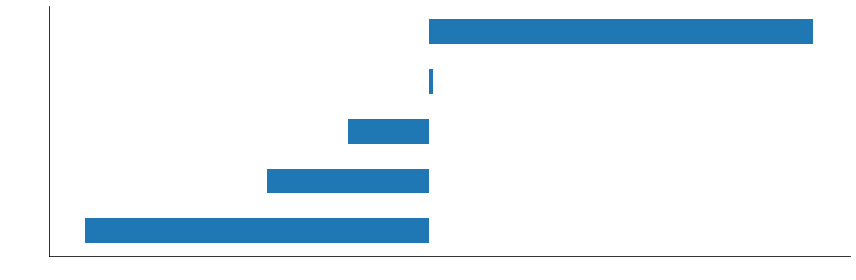

In [39]:
lambdas.mean().sort_values().plot.barh(figsize=(12, 4))
sns.despine()
plt.tick_params(colors='white', which='both')
plt.tight_layout();

In [41]:
t = lambdas.mean().div(lambdas.std())
t   

Mkt-RF    0.344369
SMB       0.002999
HML      -0.269708
RMW      -0.087423
CMA      -0.149733
dtype: float64

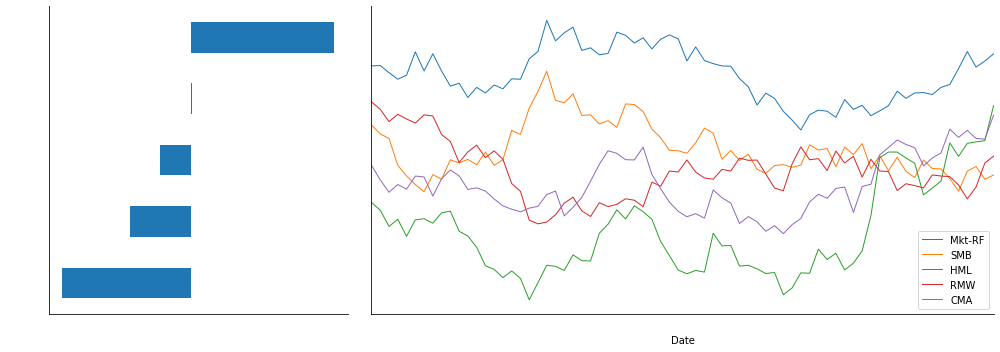

In [46]:
window = 24  # months
ax1 = plt.subplot2grid((1, 3), (0, 0))
ax1.tick_params(colors='white', which='both')
ax2 = plt.subplot2grid((1, 3), (0, 1), colspan=2)
ax2.tick_params(colors='white', which='both')
lambdas.mean().sort_values().plot.barh(ax=ax1)
lambdas.rolling(window).mean().dropna().plot(lw=1,
                                             figsize=(14, 5),
                                             sharey=True,
                                             ax=ax2)
sns.despine()
plt.tight_layout()

In [47]:
mod = LinearFactorModel(portfolios=ff_portfolio_data, 
                        factors=ff_factor_data)
res = mod.fit()
print(res)

                      LinearFactorModel Estimation Summary                      
No. Test Portfolios:                 17   R-squared:                      0.6881
No. Factors:                          5   J-statistic:                    15.790
No. Observations:                    95   P-value                         0.2010
Date:                  Wed, Jan 26 2022   Distribution:                 chi2(12)
Time:                          16:59:08                                         
Cov. Estimator:                  robust                                         
                                                                                
                            Risk Premia Estimates                             
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Mkt-RF         1.2358     0.4098     3.0156     0.0026      0.4326      2.0390
SMB            0.0117     0.8678    